# Train Deep Learning Model



In [1]:
#step-1 load the preprocess data

import os
import numpy as np
import cv2
import gc

In [2]:
# load the preprocessed data
data = np.load('./data/data_preprocess.npz')

In [3]:
X = data['arr_0']
y = data['arr_1']

X.shape, y.shape


((10000, 100, 100, 3), (10000,))

In [4]:
np.unique(y)



array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [5]:
from sklearn.preprocessing import OneHotEncoder


In [6]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [7]:
y_array = y_onehot.toarray()

In [8]:
y_array.shape

(10000, 4)

# Split the Data into Train and Test sets


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 100, 100, 3), (2000, 100, 100, 3), (8000, 4), (2000, 4))

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [12]:
# convolution neural network

model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])


# compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [14]:
# Training CNN
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=10)

Epoch 1/10
267/267 [==============================] - 85s 303ms/step - loss: 1.3871 - accuracy: 0.2436 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/10
267/267 [==============================] - 76s 283ms/step - loss: 1.3865 - accuracy: 0.2421 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/10
267/267 [==============================] - 76s 284ms/step - loss: 1.3864 - accuracy: 0.2394 - val_loss: 1.3864 - val_accuracy: 0.2460
Epoch 4/10
267/267 [==============================] - 76s 286ms/step - loss: 1.3864 - accuracy: 0.2459 - val_loss: 1.3863 - val_accuracy: 0.2460
Epoch 5/10
267/267 [==============================] - 76s 285ms/step - loss: 1.3864 - accuracy: 0.2411 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 6/10
267/267 [==============================] - 76s 285ms/step - loss: 1.3864 - accuracy: 0.2496 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 7/10
267/267 [==============================] - 76s 287ms/step - loss: 1.3864 - accuracy: 0.2428 - val_loss: 1.3863 - val_ac

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
history_df = pd.DataFrame(history.history)

In [17]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.387118,0.243625,1.386340,0.250
1,1.386502,0.242125,1.386312,0.250
2,1.386422,0.239375,1.386373,0.246
3,1.386382,0.245875,1.386341,0.246
4,1.386421,0.241125,1.386327,0.250
5,1.386430,0.249625,1.386324,0.250
6,1.386409,0.242750,1.386333,0.250
7,1.386428,0.242375,1.386369,0.246
8,1.386394,0.250375,1.386348,0.246
9,1.386394,0.247125,1.386345,0.246


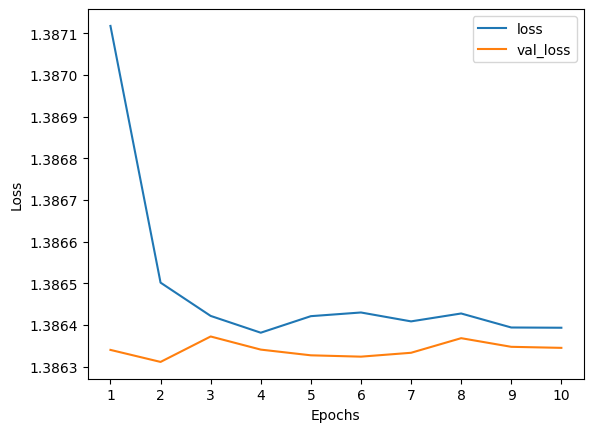

In [18]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

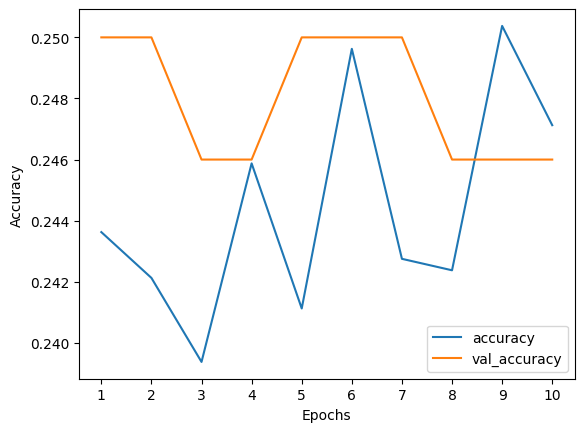

In [19]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()


In [20]:
# Save CNN Model
model.save('face_cnn_model')


#INFO:tensorflow:Assets written to: face_cnn_model\assets


INFO:tensorflow:Assets written to: face_cnn_model\assets


INFO:tensorflow:Assets written to: face_cnn_model\assets


In [21]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]